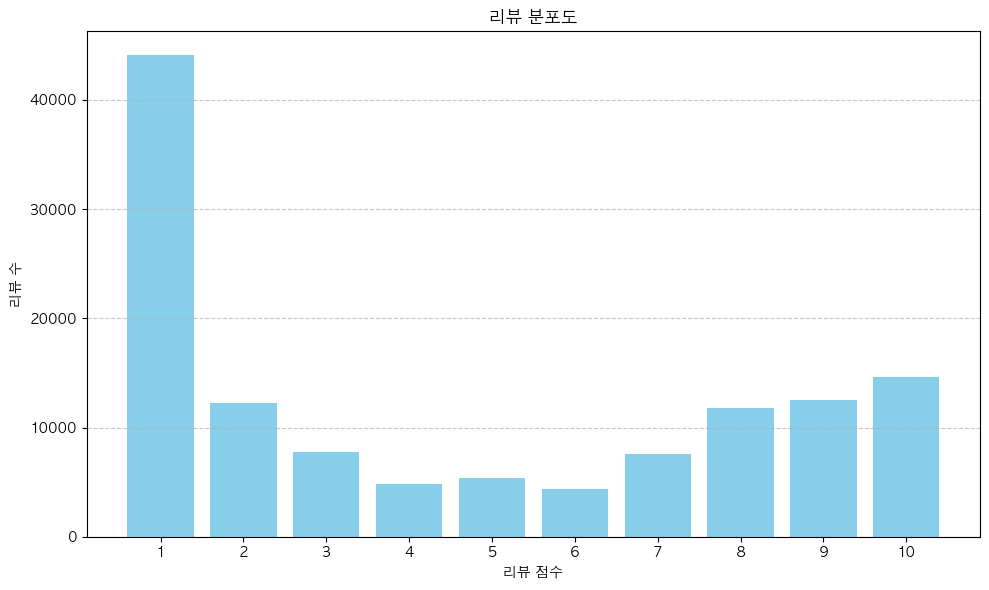

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("AirlineReviews12.csv")
score_counts = df['OverallScore'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.xlabel("리뷰 점수")
plt.ylabel("리뷰 수")
plt.title("리뷰 분포도")  # 한글 제목
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


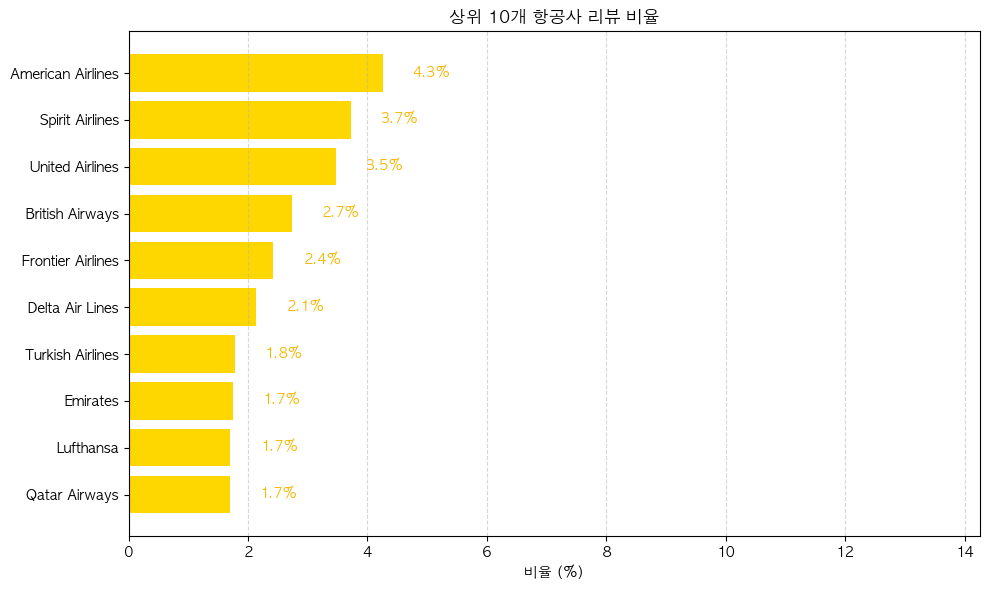

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("AirlineReviews12.csv")

# 한글 폰트 설정 (필요 시)
plt.rcParams['font.family'] = 'AppleGothic'  # Mac이면 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 상위 10개 항공사 추출
airline_counts = df['AirlineName'].value_counts(normalize=True).head(10) * 100  # 비율로 변환 (%)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(airline_counts.index[::-1], airline_counts.values[::-1], color='gold')

# 퍼센트 텍스트 추가
for bar, pct in zip(bars, airline_counts.values[::-1]):
    plt.text(pct + 0.5, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=10, color='#f5b700')

plt.xlabel("비율 (%)")
plt.title("상위 10개 항공사 리뷰 비율")
plt.xlim(0, max(airline_counts.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_23622/1180516484.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')


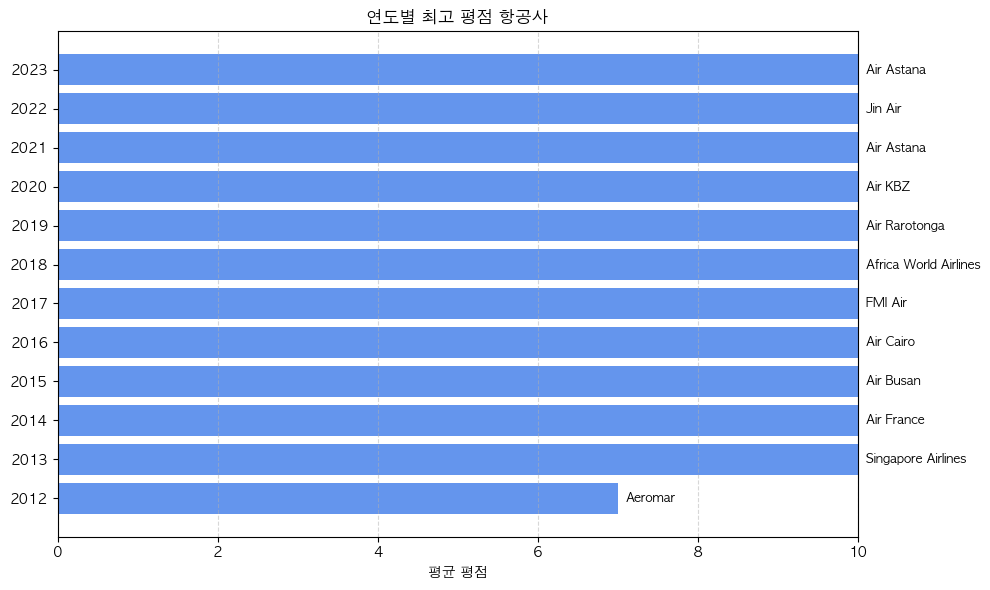

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("AirlineReviews12.csv")

# 날짜 처리
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')
df = df.dropna(subset=['DateFlown'])
df['Year'] = df['DateFlown'].dt.year

# 연도별 항공사 평균 평점 계산
grouped = df.groupby(['Year', 'AirlineName'])['OverallScore'].mean().reset_index()

# 연도별 최고 평점 항공사 선택
top_per_year = grouped.loc[grouped.groupby('Year')['OverallScore'].idxmax()].sort_values('Year')

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(top_per_year['Year'].astype(str), top_per_year['OverallScore'], color='cornflowerblue')

# 항공사 이름 추가
for bar, name in zip(bars, top_per_year['AirlineName']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             name, va='center', fontsize=9)

plt.xlim(0, 10)
plt.xlabel("평균 평점")
plt.title("연도별 최고 평점 항공사")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
